In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.utils import shuffle
import seaborn as sns

In [12]:
data = pd.read_csv("dmw.csv",header=None)
data = shuffle(data)

In [13]:
print(data.head())

      0      1      2      3       4       5       6       7   8
2971  M  0.715  0.550  0.175  1.8250  0.9380  0.3805  0.4400  11
2453  I  0.325  0.200  0.080  0.0995  0.0395  0.0225  0.0320   8
860   F  0.595  0.475  0.160  1.1405  0.5470  0.2310  0.2710   6
1959  F  0.650  0.510  0.155  1.1890  0.4830  0.2780  0.3645  13
1527  M  0.720  0.565  0.200  2.1055  1.0170  0.3630  0.4940  12


In [14]:
data[8] = np.ceil(data[8]/10).astype(int)

In [41]:
data[0]=data[0].map({"I":0,"M":1})
data.describe()

,0,1,2,3,4,5,6,7,8
count,0.0,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,1.355040
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.496269
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,1.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,1.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,2.000000
max,NaN,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


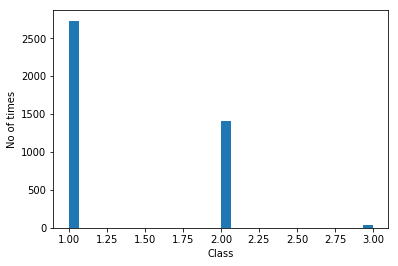

In [16]:
plt.hist(data[8],bins=30)
plt.ylabel('No of times')
plt.xlabel('Class')
plt.show()

In [17]:
data.fillna(data[0].mode(),inplace=True)
data.isnull().sum()
x = data

In [55]:
clf = SVC(gamma='auto')
x = np.array(x)
X = x[0:3500,:8].astype('float')
y = x[0:3500,8].astype('float')

test = x[3501:4177,:].astype('float')
y_test = test[:,8:]

# X = data.drop(data[0],inplace=True)

clf = SVC(gamma='auto',kernel='linear')
clf.fit(X, y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
X.shape,y.shape

((3500, 8), (3500,))

In [56]:
predicted = clf.predict(test[:,:8])
print(test)
print(predicted)

[[ 1.      0.65    0.51   ...,  0.2025  0.385   2.    ]
 [ 0.      0.41    0.335  ...,  0.064   0.105   1.    ]
 [ 0.      0.465   0.355  ...,  0.074   0.1275  1.    ]
 ..., 
 [ 1.      0.595   0.475  ...,  0.234   0.58    3.    ]
 [ 1.      0.71    0.5    ...,  0.2815  0.28    1.    ]
 [ 0.      0.565   0.435  ...,  0.158   0.255   1.    ]]
[ 2.  1.  1.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.
  2.  1.  1.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.
  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  1.
  1.  1.  2.  1.  1.  2.  1.  2.  2.  1.  1.  2.  1.  1.  1.  2.  1.  1.
  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.  2.  1.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  2.  1.  1.
  1.  1.  1.  2.  1.  1.  1.  2.  1.  1.  1.  2.  2.  2.  1.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.
  2.  2.  1.  1.  1.  1.  1.  1.  2.  2.  1.  2.  2.  1.  2.  1.  2.  1.

In [57]:
count=0
for l in range(675):
    if(predicted[l]==test[l,8]):
        count=count+1
print((count/675)*100)

79.4074074074074


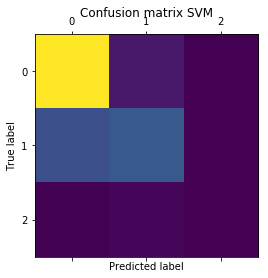

In [58]:
from sklearn.metrics import confusion_matrix
labels = [1,2,3]
conf_mat = confusion_matrix(y_test,predicted,labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.matshow(conf_mat)
plt.title('Confusion matrix SVM')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
fig.savefig('svm.png')
plt.close(fig)

In [59]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None)

In [60]:
predicted= model.predict(test[:,0:8])
print(test[:,8])
print(predicted)

[ 2.  1.  1.  2.  1.  1.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  3.  1.
  2.  1.  2.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  2.  2.  2.  1.  2.
  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  2.  1.
  1.  1.  2.  1.  1.  2.  1.  2.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.
  1.  2.  2.  1.  1.  2.  1.  2.  1.  1.  2.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  2.  1.  1.
  1.  2.  1.  2.  1.  1.  1.  2.  2.  1.  1.  2.  2.  2.  1.  1.  1.  1.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.  1.  1.  1.  1.
  2.  2.  1.  1.  1.  1.  2.  1.  2.  2.  1.  1.  2.  1.  2.  1.  1.  1.
  2.  1.  2.  1.  2.  2.  2.  1.  1.  2.  1.  2.  1.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  2.  2.  2.  1.  1.  1.  2.  1.  1.  1.  1.  2.  2.
  1.  2.  1.  1.  2.  1.  1.  2.  2.  1.  1.  1.  1.  1.  1.  2.  1.  2.
  1.  2.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  1.  1.
  1.  1.  2.  2.  2.  1.  1.  1.  2.  1.  1.  1.  2

In [61]:
count=0
for l in range(675):
    if(predicted[l]==test[l,8]):
        count=count+1
print((count/675)*100)

65.48148148148148


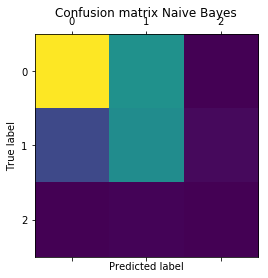

In [62]:
from sklearn.metrics import confusion_matrix
labels = [1,2,3]
conf_mat = confusion_matrix(y_test,predicted,labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.matshow(conf_mat)
plt.title('Confusion matrix Naive Bayes')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
fig.savefig('naive.png')
plt.close(fig)

In [63]:
from sklearn.tree import DecisionTreeClassifier
model_decision = DecisionTreeClassifier()
model_decision.fit(X,y)

predicted = model_decision.predict(test[:,:8])
print(test)
print(predicted)


[[ 1.      0.65    0.51   ...,  0.2025  0.385   2.    ]
 [ 0.      0.41    0.335  ...,  0.064   0.105   1.    ]
 [ 0.      0.465   0.355  ...,  0.074   0.1275  1.    ]
 ..., 
 [ 1.      0.595   0.475  ...,  0.234   0.58    3.    ]
 [ 1.      0.71    0.5    ...,  0.2815  0.28    1.    ]
 [ 0.      0.565   0.435  ...,  0.158   0.255   1.    ]]
[ 2.  1.  1.  2.  2.  2.  2.  1.  1.  2.  1.  1.  1.  2.  1.  1.  2.  1.
  2.  1.  2.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.
  1.  2.  3.  1.  1.  2.  1.  2.  1.  2.  2.  1.  1.  1.  1.  2.  1.  1.
  2.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  2.  2.  1.
  1.  1.  1.  1.  1.  2.  1.  2.  2.  1.  2.  1.  1.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  2.
  1.  1.  1.  1.  1.  1.  2.  2.  2.  1.  1.  2.  2.  2.  2.  1.  1.  1.
  1.  2.  2.  1.  1.  1.  2.  1.  1.  1.  2.  1.  2.  2.  1.  1.  1.  1.
  2.  1.  1.  1.  1.  2.  2.  1.  1.  2.  1.  2.  2.  1.  2.  1.  2.  1.

In [39]:
count=0
for l in range(675):
    if(predicted[l]==test[l,8]):
        count=count+1
print((count/675)*100)

69.92592592592592


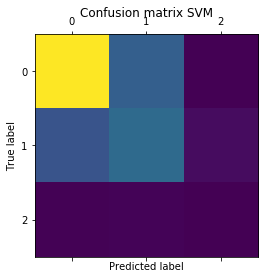

In [64]:
from sklearn.metrics import confusion_matrix
labels = [1,2,3]
conf_mat = confusion_matrix(y_test,predicted,labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.matshow(conf_mat)
plt.title('Confusion matrix SVM')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
fig.savefig('decision.png')
plt.close(fig)